In [1]:
import ROOT as rt
import time

from ipywidgets import interact, FloatSlider

Welcome to JupyROOT 6.18/04


In [2]:
canvas = rt.TCanvas("pid")

In [3]:
input_file = rt.TFile("../online/AnalysisResults.root")
object_list = input_file.Get("h-lambda")

signal_hist = object_list.FindObject("fSignalAnalysis")

In [4]:
def set_sigma(TpcNSigmaPion, TofNSigmaPion, TpcNSigmaProton, TofNSigmaProton):
    
    signal_hist.GetAxis(0).SetRangeUser(-TpcNSigmaPion, TpcNSigmaPion)
    signal_hist.GetAxis(1).SetRangeUser(-TofNSigmaPion, TofNSigmaPion)
    signal_hist.GetAxis(2).SetRangeUser(-TpcNSigmaProton, TpcNSigmaProton)
    signal_hist.GetAxis(3).SetRangeUser(-TofNSigmaProton, TofNSigmaProton)
    
    signal_hist.SetName(f"{time.time()}")

In [23]:
interact(set_sigma, 
         TpcNSigmaPion=FloatSlider(min=0, max=10, step=0.25, value=0), 
         TofNSigmaPion=FloatSlider(min=0, max=10, step=0.25, value=0), 
         TpcNSigmaProton=FloatSlider(min=0, max=10, step=0.25
                                     , value=0),
         TofNSigmaProton=FloatSlider(min=0, max=10, step=0.25, value=0))

interactive(children=(FloatSlider(value=0.0, description='TpcNSigmaPion', max=10.0, step=0.25), FloatSlider(va…

<function __main__.set_sigma(TpcNSigmaPion, TofNSigmaPion, TpcNSigmaProton, TofNSigmaProton)>

In [24]:
signal_hist.GetAxis(5).SetRangeUser(2, 4)

Warning in <TFile::Append>: Replacing existing TH1: 1586285397.6885571_proj_4 (Potential memory leak).


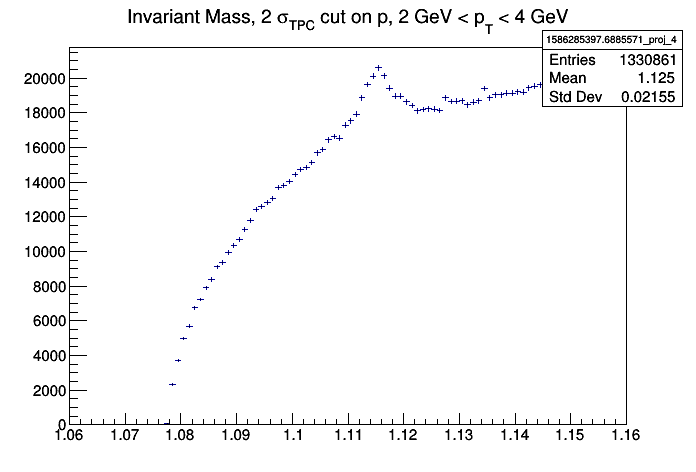

In [29]:
mass_hist = signal_hist.Projection(4)
mass_hist.Sumw2()
mass_hist.SetTitle("Invariant Mass, 0.5 #sigma_{TPC} cut on p, 2 GeV < p_{T} < 4 GeV")
mass_hist.Draw()
canvas.Draw()